In [109]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable

In [110]:
def plot_trajectories(length: float, num_splits: int, num_traj: int, 
                      y_label: str = "$W_t$",
                      process_name: str = "Wiener process",
                      sim_func: Callable = create_path_BM, 
                      **sim_func_kwargs) -> None:
    """
    just a simple plotting function
    """
    
    plt.figure(figsize=(13, 7))
    for traj in range(num_traj):
        plt.plot(np.arange(0, length, length/(num_splits + 1)), 
                 sim_func(length, num_splits, **sim_func_kwargs))
    
    plt.xlabel("$t$")
    plt.ylabel(y_label)
    plt.title(f"Simulated trajectories of a {process_name}")
    plt.xlim(0, length)
    
    plt.show()

## 1. Brownian motion

### 1.1 Simple Brownian motion trajectories

In [111]:
def create_path_BM(length: float, num_splits: int) -> np.ndarray:
    """
    length: float -- last moment of time to be simulated
    num_splits: int -- number of increments to create, 
    increment is \Delta W_t and it is sample from N(0, T/N)
    
    return trajectory of brownian motion
    """
    increments = np.random.normal(loc=0, 
                                  scale=(length/num_splits) ** 0.5, 
                                  size=num_splits)
    
    trajectory = np.zeros(num_splits+1)
    trajectory[1:] = np.cumsum(increments)
    return trajectory

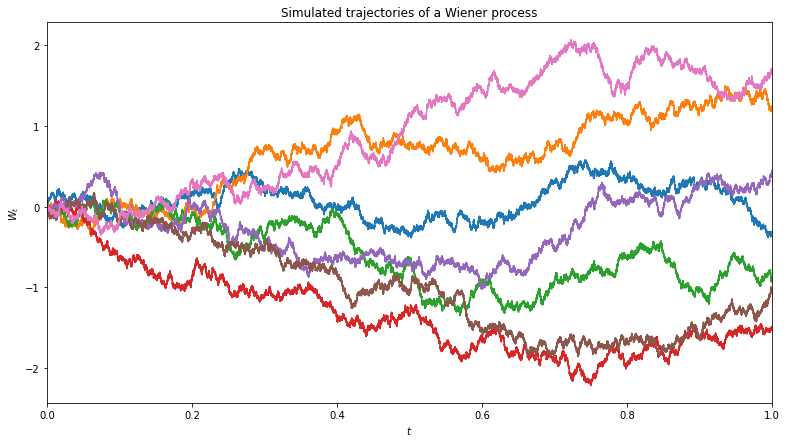

In [112]:
plot_trajectories(1, 100000, 7)

### 1.2 BM with drift

In [113]:
def create_path_BM_drift(length: float, num_splits: int,
                          slope: int = 0, sd: int = 1) -> np.ndarray:
    """
    Same as simple BM trajectories but with a slope and sd parameters
    
    return a trajectrory of Brownian motion with drift
    """
    basic_BM_traj = create_path_BM(length, num_splits)
    
    linear_part = slope * np.arange(0, length, length/(num_splits + 1))
    
    trajectory = linear_part + sd * basic_BM_traj
    return trajectory

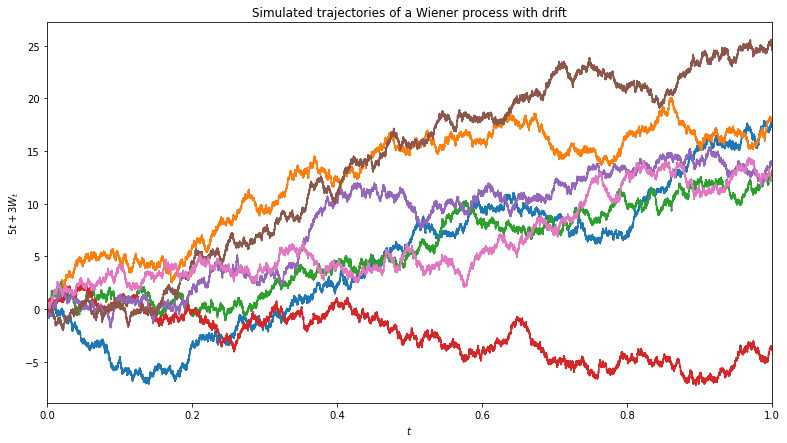

In [114]:
plot_trajectories(1, 100000, 7, f"${5}t + 3 W_t$", 
                  "Wiener process with drift",
                  create_path_BM_drift, slope=15, sd=8)

### 1.3 Brownian bridge

$$
B_t = W_t - \cfrac{t}{T} W_T
$$

In [115]:
def create_path_BB(length: float, num_splits: int) -> np.ndarray:
    """
    Same as create_path_BN
    
    return simulated brownian bridge
    """
    basic_BM_traj = create_path_BM(length, num_splits)
    
    linear_part = np.arange(0, length, length/(num_splits + 1))
    
    trajectory = basic_BM_traj - linear_part / length * basic_BM_traj[-1]
    return trajectory

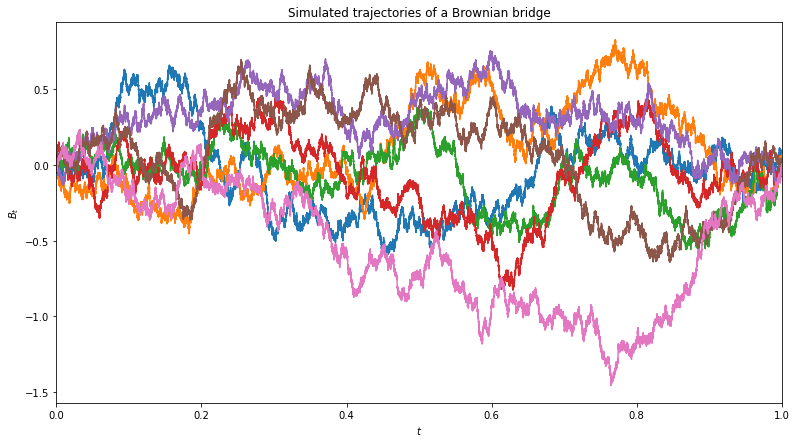

In [116]:
plot_trajectories(1, 100000, 7, 
                  "$B_t$", 
                  "Brownian bridge",
                  sim_func=create_path_BB)

### 1.4 Geometric Brownian Motion

$$
S_t = S_0 \exp((\mu - 0.5\sigma^2)t + \sigma W_t)
$$

In [117]:
def create_path_geometric_BM(length: float, num_splits: int,
                          mu: int = 0, sd: int = 1, s_0: int = 1) -> np.ndarray:
    """
    Same as simple BM trajectories but with a slope and sd parameters
    
    return a trajectrory of geometric Brownian motion 
    """
    basic_BM_traj = create_path_BM(length, num_splits)
    
    linear_part = (mu - sd/2) ** 2  * np.arange(0, length, length/(num_splits + 1))
    
    trajectory = s_0 * np.exp(linear_part + sd * basic_BM_traj)
    return trajectory

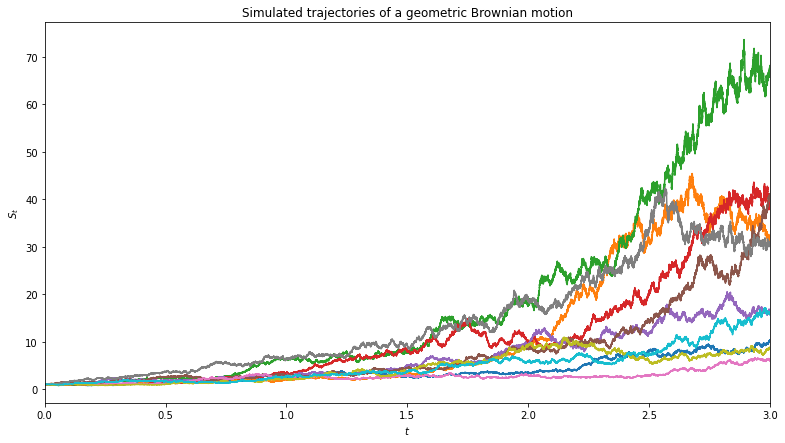

In [131]:
plot_trajectories(3, 100000, 10, 
                  "$S_t$", 
                  "geometric Brownian motion",
                  sim_func=create_path_geometric_BM, mu=1.2, sd=0.5)

## 2. SDE

$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$

In [161]:
def Black_Scholes_SDE(length: float, num_splits: int,
                     mu: int = 0, sd: int = 1, s_0: int = 1) -> np.ndarray:
    
    
    delta = length / num_splits
    
    increments = np.random.normal(loc=0, 
                                  scale= delta ** 0.5, 
                                  size=num_splits)
    S_t = np.zeros(num_splits + 1)
    S_t[0] = s_0
    
    for i in range(1, num_splits):
        S_t[i] = S_t[i-1] + mu * S_t[i-1]* delta + sd * S_t[i-1] * increments[i]
    
    return S_t

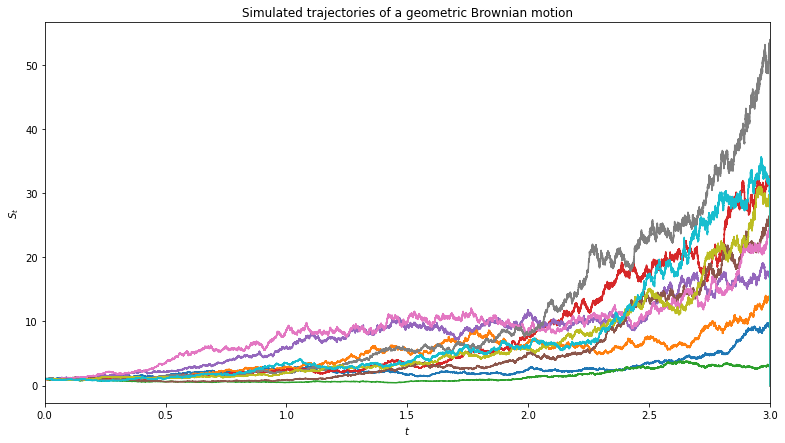

In [164]:
plot_trajectories(3, 100000, 10, 
                  "$S_t$", 
                  "geometric Brownian motion",
                  sim_func=Black_Scholes_SDE, mu=1.2, sd=0.5)